In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.animation as animation
from drl_grams import *
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.lines import Line2D
import os

mpl.rcParams.update({'font.size': 12})
plt.rcParams['axes.axisbelow'] = True
%matplotlib widget
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.linewidth'] = 2
#mpl.rcParams['axes.prop_cycle'] = cycler(color='bgrkmyc')
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=["b", "g", "r", 'k','y' , 'm','tab:orange', 'tab:cyan', 'tab:brown', 'slategrey', 'deeppink' ]) 

# Genetic Algorithms

In the directory `genetic_algorithm_results/` the results obtained using genetic algorithms can be found. Different subdirectories represent different combinations of hyperparameters. First, we will study 20 samples obtained using three different fitness functions:

- **reward based**: (reward_based) emulates RL reward from [1], in the sense that it accumulates over time steps rewarding better fidelity and discounting for each extra step with a reward decay gamma to promote faster transmissions
- **natural based**: (loc_based) also accumulates over time steps but rewards a transmission that behaves in a similar way to the natural evolution. The *wave* propagates at a similar speed but tries to achieve a higher max probability.
- **ipr based**: (ipr_based) rewards a localized transition, in the sense that it attempts to have a concentrated package

We also study two action sets:
- **Zhang actions**: Set of actions used in the original work of Zhang et al [1]
- **One Action Per Site**: Set of actions consisting of the N actions corresponding to a control site on each qubit plus the *zero* action which means not controlling any site.

Different subdirectories represent different combinations of hyperparameters. For example, the following 4 subdirectories include results correspoding to the two first described fitness functions for both action sets. 

In [2]:
rb_zhang = 'genetic_algorithm_results/rb_zhang/'   # Reward-based fitness function and Zhang et al actions
rb_oaps = 'genetic_algorithm_results/rb_oaps/'     # Reward-based fitness function and one action per site
nb_zhang = 'genetic_algorithm_results/nb_zhang/'   # Natural-based fitness function and Zhang et al actions
nb_oaps = 'genetic_algorithm_results/nb_oaps/'     # Natural-based fitness function and one action per site
ipr_oaps = 'genetic_algorithm_results/ipr_oaps/'     # IPR-based fitness function and one action per site
ipr_zhang = 'genetic_algorithm_results/ipr_zhang/'   # IPR-based fitness function and Zhang et al actions
directories = [rb_zhang, rb_oaps, nb_zhang, nb_oaps, ipr_oaps, ipr_zhang]


A summary of all the hyper-parameters and system parameters used to obtain each directory can be accesed by calling the `access_ga_params` function. For example, the output of the following cell shows the parameters corresponding to the directory `rb_zhang`, where we employ reward-based fitness and Zhang et al actions, which can be verified in the printed dataframe. 

In [3]:
rb_zhang_parameters = access_ga_params(rb_zhang,print_params=True)

Accessing GA parameters from genetic_algorithm_results/rb_zhang/...
Showing parameters for genetic_algorithm_results/rb_zhang/:
╒═══════════════════╤═══════════════════════╤══════════════╕
│ Section           │ Parameter             │ Value        │
╞═══════════════════╪═══════════════════════╪══════════════╡
│ system_parameters │ initial_n             │ 8            │
├───────────────────┼───────────────────────┼──────────────┤
│ system_parameters │ final_n               │ 64           │
├───────────────────┼───────────────────────┼──────────────┤
│ system_parameters │ n_step                │ 4            │
├───────────────────┼───────────────────────┼──────────────┤
│ system_parameters │ dt                    │ 0.15         │
├───────────────────┼───────────────────────┼──────────────┤
│ system_parameters │ b                     │ 100          │
├───────────────────┼───────────────────────┼──────────────┤
│ system_parameters │ speed_fraction        │ 1.1          │
├─────────────────

We can also access a particular parameter value using `get_parameter_value`

In [4]:
for directory in directories:
    print('--------------------------------------------------')
    print('Directory: ', directory)
    print('--------------------------------------------------')
    ga_params = access_ga_params(directory,print_params=False)
    used_fitness = get_parameter_value(ga_params,'fitness_function',print_value=True)
    used_actions = get_parameter_value(ga_params,'action_set',print_value=True)


--------------------------------------------------
Directory:  genetic_algorithm_results/rb_zhang/
--------------------------------------------------
Accessing GA parameters from genetic_algorithm_results/rb_zhang/...
Parameter 'fitness_function' :  reward_based
Parameter 'action_set' :  zhang
--------------------------------------------------
Directory:  genetic_algorithm_results/rb_oaps/
--------------------------------------------------
Accessing GA parameters from genetic_algorithm_results/rb_oaps/...
Parameter 'fitness_function' :  reward_based
Parameter 'action_set' :  oaps
--------------------------------------------------
Directory:  genetic_algorithm_results/nb_zhang/
--------------------------------------------------
Accessing GA parameters from genetic_algorithm_results/nb_zhang/...
Parameter 'fitness_function' :  nat_based
Parameter 'action_set' :  zhang
--------------------------------------------------
Directory:  genetic_algorithm_results/nb_oaps/
-----------------------

And access different parameters across a set of directories

In [5]:
get_different_parameters(directories,print_params=True)

Accessing GA parameters from genetic_algorithm_results/rb_zhang/...
Accessing GA parameters from genetic_algorithm_results/rb_oaps/...
Accessing GA parameters from genetic_algorithm_results/nb_zhang/...
Accessing GA parameters from genetic_algorithm_results/nb_oaps/...
Accessing GA parameters from genetic_algorithm_results/ipr_oaps/...
Accessing GA parameters from genetic_algorithm_results/ipr_zhang/...

Parameters with Different Values:
╒═════════════╤═══════════════════════════════════════╤════════════════════════════════════════╤══════════════════════════════════════╤═══════════════════════════════════════╤══════════════════════════════════════╤═══════════════════════════════════════╕
│ Parameter   │ genetic_algorithm_results/ipr_oaps/   │ genetic_algorithm_results/ipr_zhang/   │ genetic_algorithm_results/nb_oaps/   │ genetic_algorithm_results/nb_zhang/   │ genetic_algorithm_results/rb_oaps/   │ genetic_algorithm_results/rb_zhang/   │
╞═════════════╪═════════════════════════════════

Directory,genetic_algorithm_results/ipr_oaps/,genetic_algorithm_results/ipr_zhang/,genetic_algorithm_results/nb_oaps/,genetic_algorithm_results/nb_zhang/,genetic_algorithm_results/rb_oaps/,genetic_algorithm_results/rb_zhang/
Parameter,,,,,,
actions,oaps,zhang,oaps,zhang,oaps,zhang
directory,ipr_oaps,ipr_zhang,nb_oaps,nb_zhang,rb_oaps,rb_zhang
fitness,ipr_based,ipr_based,nat_based,nat_based,reward_based,reward_based


We can analyze the obtained results for different combinations of fitness functions and rewards. The results file contains the following metrics: 

- `max_fidelity`: max. transmission probability
- `ttime`: time step for which the maximum transmission probability is achieved
- `cpu_time`: cpu time spent for that sample
- `generations` : number of genetic algorithm generations


The `plot_metric` function shows the mean and max value of the different metrics across the 20 samples (or, in general, all the samples in the provided directory). It takes as arguments the directories to analyze and the corresponding metric. 

### Mean and max fidelity

Accessing GA parameters from genetic_algorithm_results/rb_zhang/...
Accessing GA parameters from genetic_algorithm_results/rb_oaps/...
Accessing GA parameters from genetic_algorithm_results/nb_zhang/...
Accessing GA parameters from genetic_algorithm_results/nb_oaps/...
Accessing GA parameters from genetic_algorithm_results/ipr_oaps/...
Accessing GA parameters from genetic_algorithm_results/ipr_zhang/...
['ipr_oaps', 'ipr_zhang', 'nb_oaps', 'nb_zhang', 'rb_oaps', 'rb_zhang']


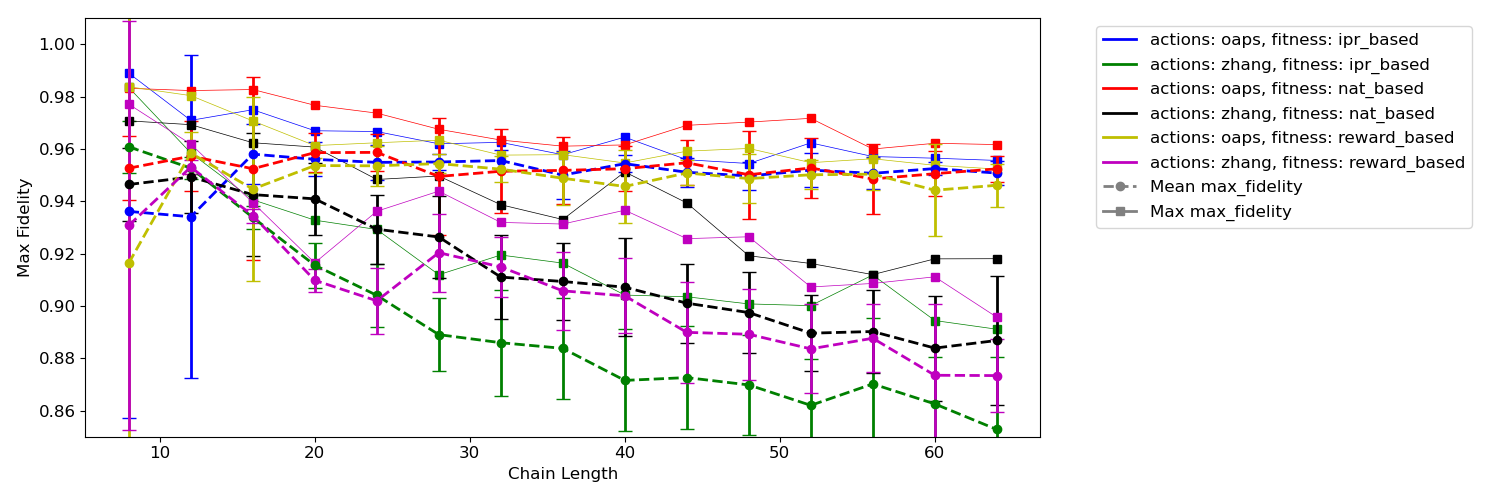

In [6]:
plt.figure(figsize=(15, 5))
plot_metric(directories,'max_fidelity')
plt.ylabel('Max Fidelity')
plt.xlabel('Chain Length')
plt.ylim(0.85,1.01)
plt.tight_layout()

As one would expect, the first set of actions performs poorly for longer chains since it has less control sites. We are currently studying the minimum number of control sites required to achieve an acceptable transmission. Fitness function does not have such a strong effect on the achieved transmission probability but in the following section we will see that it does affect the behaviour of the transmission.

### CPU time

Accessing GA parameters from genetic_algorithm_results/rb_zhang/...
Accessing GA parameters from genetic_algorithm_results/rb_oaps/...
Accessing GA parameters from genetic_algorithm_results/nb_zhang/...
Accessing GA parameters from genetic_algorithm_results/nb_oaps/...
Accessing GA parameters from genetic_algorithm_results/ipr_oaps/...
Accessing GA parameters from genetic_algorithm_results/ipr_zhang/...
['ipr_oaps', 'ipr_zhang', 'nb_oaps', 'nb_zhang', 'rb_oaps', 'rb_zhang']


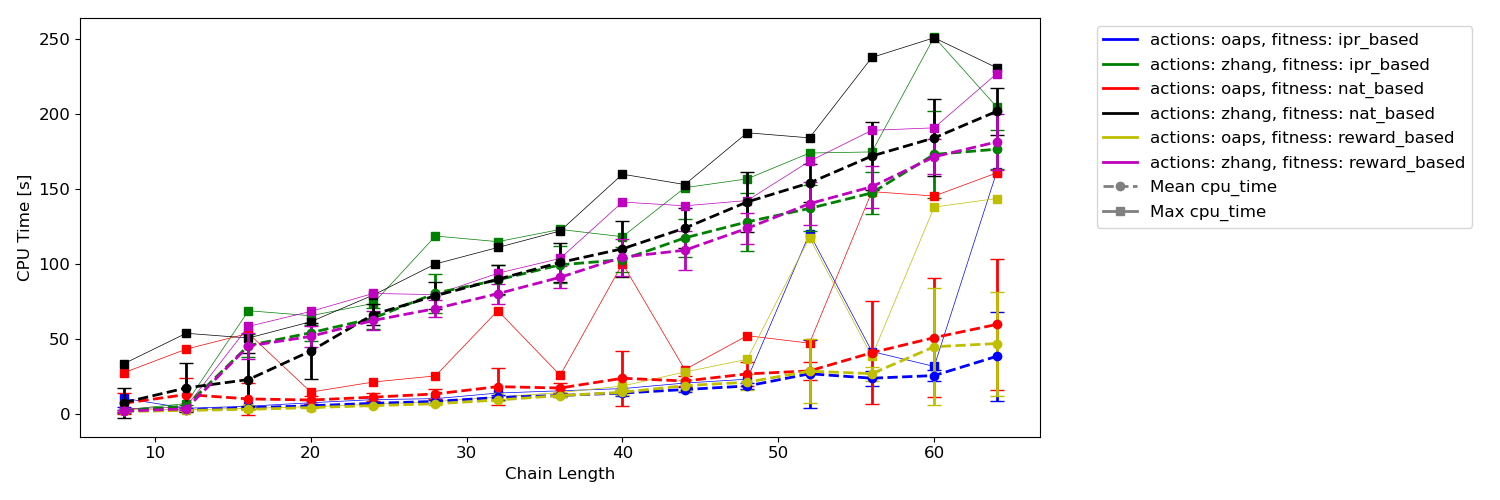

In [7]:
plt.figure(figsize=(15, 5))
plot_metric(directories,'cpu_time')
plt.xlabel('Chain Length')
plt.ylabel('CPU Time [s]')
plt.tight_layout()

Even for long chains, the algorithm is really efficient. The longer times in worse performance scenarios have to do with the fact that if the algorithm does not converge it takes a longer total time since it performs more generations trying to find a better solution.

# Effect in the solution of different fitness functions

To study the effect of different fitness functions we can also study the behaviour of the transition probability over time. `plot_ga_solutions` will plot all solutions for a definite chain length in the provided directories. For example, the following graph shows all the solutions found for chains of length 16, using one action per site and the three different fitness functions.

Accessing GA parameters from genetic_algorithm_results/nb_oaps/...
Accessing GA parameters from genetic_algorithm_results/rb_oaps/...
Accessing GA parameters from genetic_algorithm_results/ipr_oaps/...
['act_sequence_n16_sample5.dat', 'act_sequence_n16_sample2.dat', 'act_sequence_n16_sample9.dat', 'act_sequence_n16_sample17.dat', 'act_sequence_n16_sample10.dat', 'act_sequence_n16_sample16.dat', 'act_sequence_n16_sample11.dat', 'act_sequence_n16_sample12.dat', 'act_sequence_n16_sample13.dat', 'act_sequence_n16_sample4.dat', 'act_sequence_n16_sample6.dat', 'act_sequence_n16_sample7.dat', 'act_sequence_n16_sample1.dat', 'act_sequence_n16_sample14.dat', 'act_sequence_n16_sample18.dat', 'act_sequence_n16_sample15.dat', 'act_sequence_n16_sample3.dat', 'act_sequence_n16_sample0.dat', 'act_sequence_n16_sample8.dat', 'act_sequence_n16_sample19.dat', 'config.ini']
['act_sequence_n16_sample5.dat', 'act_sequence_n16_sample2.dat', 'act_sequence_n16_sample9.dat', 'act_sequence_n16_sample17.dat', 'ac

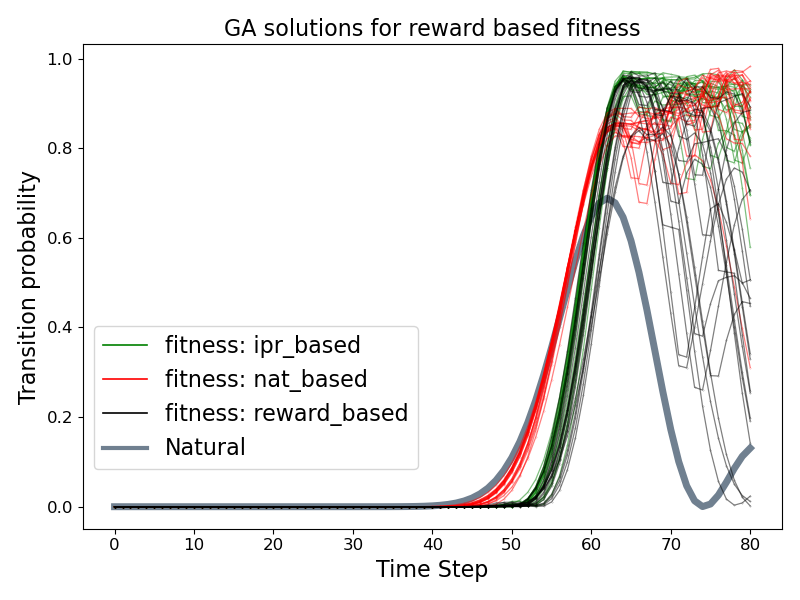

In [8]:
plt.figure(figsize=(8, 6))
plt.title('GA solutions for reward based fitness', fontsize=16)
n=16
plot_ga_solutions([nb_oaps,rb_oaps, ipr_oaps],n,add_natural=True,fs=16)


We can also plot only the max_fid solutions using `plot_max_fid_solutions`. The following graph shows clearly how using a fitness that rewards a behaviour similar to the natural evolution the found sequence adopts the shape of the natural evolution of the transition probability. Howeer, the scenario where we have a high transition probability over more time steps might be preferable.

Accessing GA parameters from genetic_algorithm_results/nb_zhang/...
Accessing GA parameters from genetic_algorithm_results/rb_zhang/...
Accessing GA parameters from genetic_algorithm_results/ipr_zhang/...
['act_sequence_n16_sample5.dat', 'act_sequence_n16_sample2.dat', 'act_sequence_n16_sample9.dat', 'act_sequence_n16_sample17.dat', 'act_sequence_n16_sample10.dat', 'act_sequence_n16_sample16.dat', 'act_sequence_n16_sample11.dat', 'act_sequence_n16_sample12.dat', 'act_sequence_n16_sample13.dat', 'act_sequence_n16_sample4.dat', 'act_sequence_n16_sample6.dat', 'act_sequence_n16_sample7.dat', 'act_sequence_n16_sample1.dat', 'act_sequence_n16_sample14.dat', 'act_sequence_n16_sample18.dat', 'act_sequence_n16_sample15.dat', 'act_sequence_n16_sample3.dat', 'act_sequence_n16_sample0.dat', 'act_sequence_n16_sample8.dat', 'act_sequence_n16_sample19.dat', 'config.ini']
Max fid: 0.9405409671811802 Max Index: 11
Max fid: 0.9396640855054943 Max Index: 12
['act_sequence_n16_sample5.dat', 'act_sequence

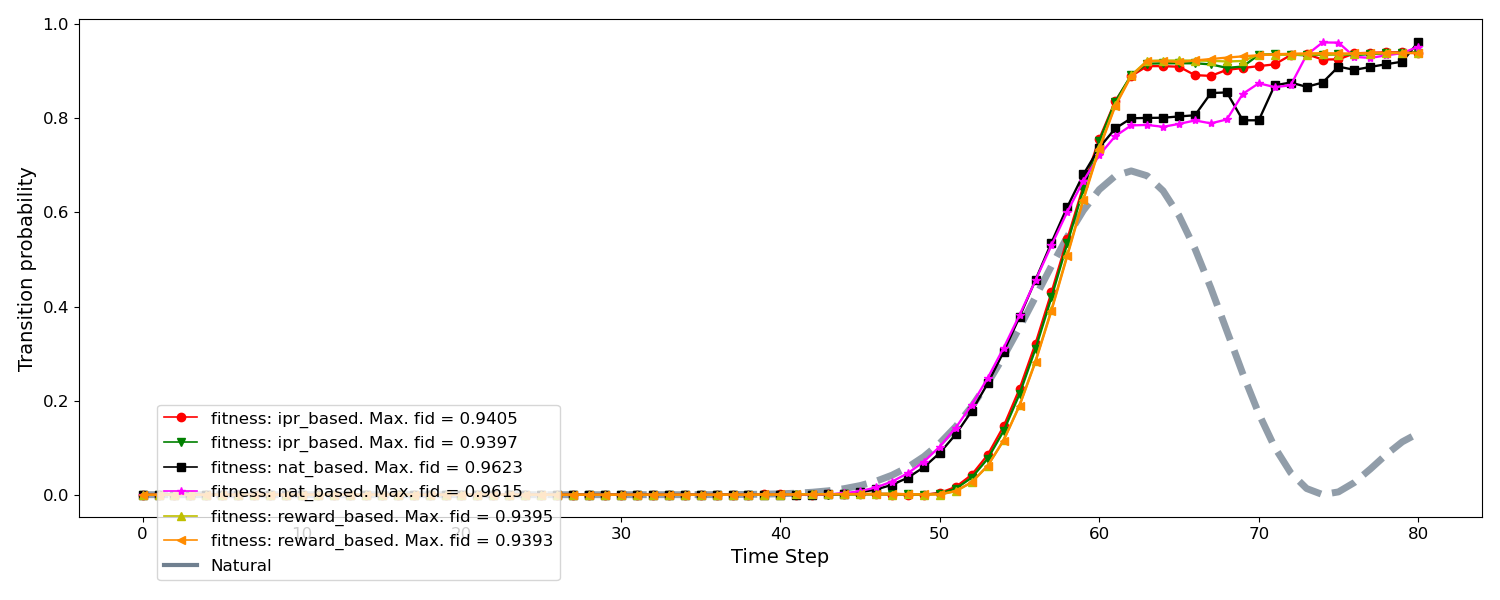

In [9]:
plt.figure(figsize=(15, 6))
plot_max_fid_solutions([nb_zhang,rb_zhang,ipr_zhang],16,add_natural=True,fs=14,nsamples=2)

Accessing GA parameters from genetic_algorithm_results/nb_oaps/...
Accessing GA parameters from genetic_algorithm_results/rb_oaps/...
Accessing GA parameters from genetic_algorithm_results/ipr_oaps/...
['act_sequence_n16_sample5.dat', 'act_sequence_n16_sample2.dat', 'act_sequence_n16_sample9.dat', 'act_sequence_n16_sample17.dat', 'act_sequence_n16_sample10.dat', 'act_sequence_n16_sample16.dat', 'act_sequence_n16_sample11.dat', 'act_sequence_n16_sample12.dat', 'act_sequence_n16_sample13.dat', 'act_sequence_n16_sample4.dat', 'act_sequence_n16_sample6.dat', 'act_sequence_n16_sample7.dat', 'act_sequence_n16_sample1.dat', 'act_sequence_n16_sample14.dat', 'act_sequence_n16_sample18.dat', 'act_sequence_n16_sample15.dat', 'act_sequence_n16_sample3.dat', 'act_sequence_n16_sample0.dat', 'act_sequence_n16_sample8.dat', 'act_sequence_n16_sample19.dat', 'config.ini']
Max fid: 0.9749522982256806 Max Index: 1
Max fid: 0.9717010898466233 Max Index: 9
['act_sequence_n16_sample5.dat', 'act_sequence_n16_

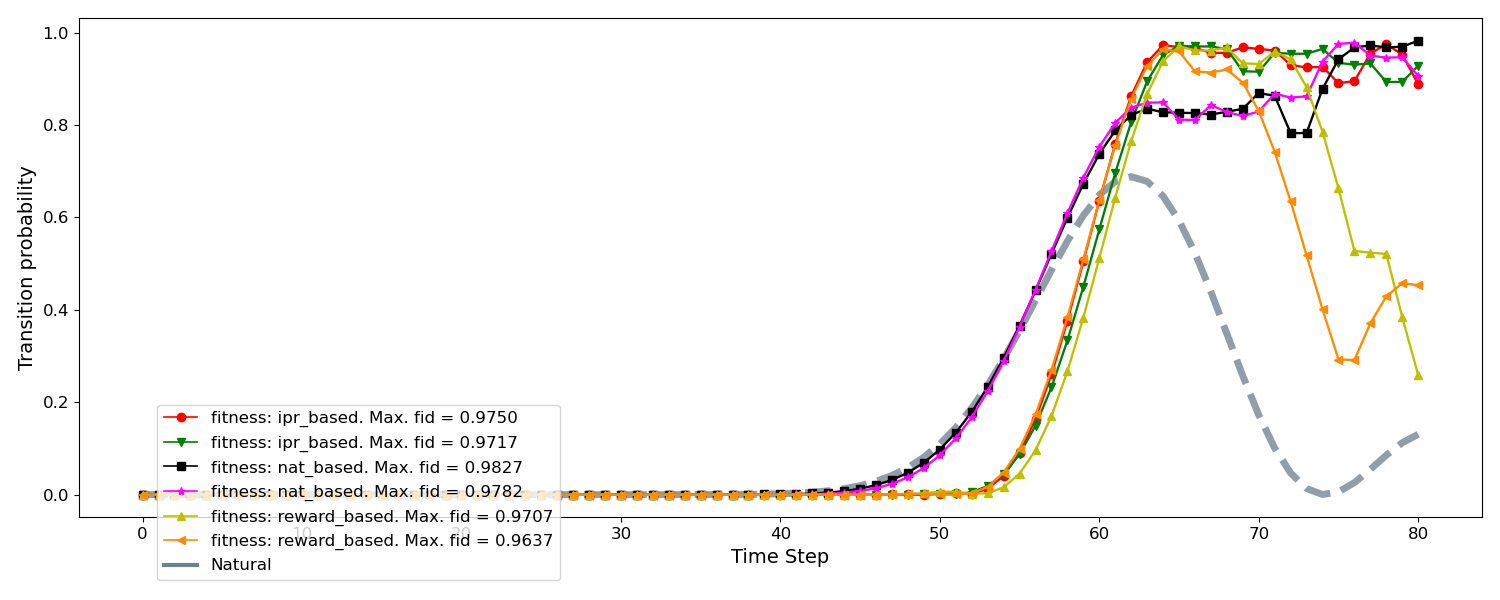

In [10]:
plt.figure(figsize=(15, 6))
plot_max_fid_solutions([nb_oaps, rb_oaps, ipr_oaps] ,16,add_natural=True,fs=14,nsamples=2)

The results improve when using one action per site which makes sense since more control sites are being employed, allowing greater fidelities.

We can test the limits of our method by imposing a lower tolerance. For example, taking tol = 0.01 or even lower. The following graph includes the results


Accessing GA parameters from genetic_algorithm_results/rb_zhang_ht/...
Accessing GA parameters from genetic_algorithm_results/rb_oaps_ht...
Accessing GA parameters from genetic_algorithm_results/rb_oaps_t999...
['rb_oaps_ht', 'rb_oaps_t999', 'rb_zhang_ht']
Accessing GA parameters from genetic_algorithm_results/rb_zhang_ht/...
Accessing GA parameters from genetic_algorithm_results/rb_oaps_ht...

Parameters with Different Values:
╒═════════════╤════════════════════════════════════════╤══════════════════════════════════════════╕
│ Parameter   │ genetic_algorithm_results/rb_oaps_ht   │ genetic_algorithm_results/rb_zhang_ht/   │
╞═════════════╪════════════════════════════════════════╪══════════════════════════════════════════╡
│ actions     │ oaps                                   │ zhang                                    │
├─────────────┼────────────────────────────────────────┼──────────────────────────────────────────┤
│ directory   │ rb_oaps_ht                             │ rb_zhang_ht

Directory,genetic_algorithm_results/rb_oaps_ht,genetic_algorithm_results/rb_zhang_ht/
Parameter,,
actions,oaps,zhang
directory,rb_oaps_ht,rb_zhang_ht


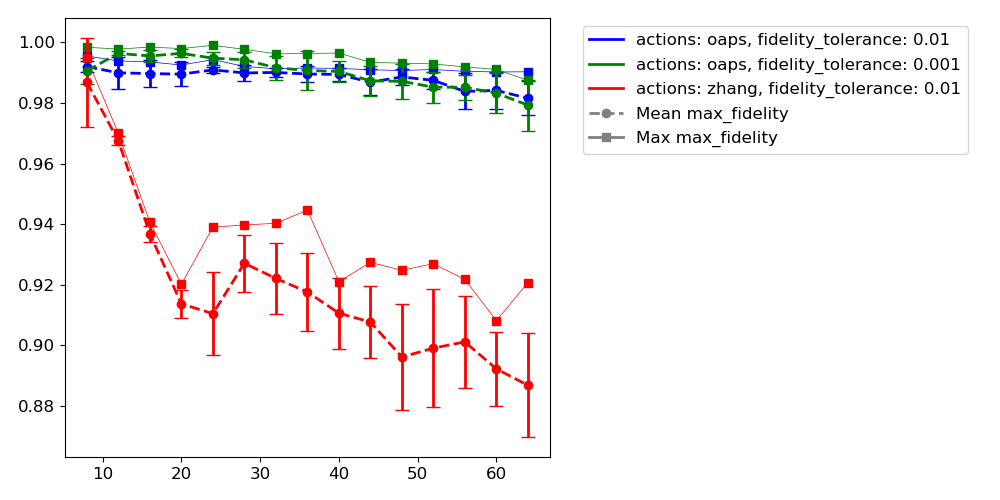

In [11]:
rb_zhang_ht = 'genetic_algorithm_results/rb_zhang_ht/'
rb_oaps_ht = 'genetic_algorithm_results/rb_oaps_ht'
rb_oaps_htt = 'genetic_algorithm_results/rb_oaps_t999'
plt.figure(figsize=(10,5))
plot_metric([rb_zhang_ht,rb_oaps_ht, rb_oaps_htt],column='max_fidelity')
plt.tight_layout()
directories = [rb_zhang_ht,rb_oaps_ht]
get_different_parameters(directories,print_params=True)

We can also inspect the behaviour of our solutions. Here we show the evolution of transmission fidelity for chain lengths of: 16,24 and 40 spins

Accessing GA parameters from genetic_algorithm_results/rb_zhang_ht/...
Accessing GA parameters from genetic_algorithm_results/rb_oaps_ht...
Accessing GA parameters from genetic_algorithm_results/rb_oaps_t999...
['act_sequence_n16_sample5.dat', 'act_sequence_n16_sample2.dat', 'act_sequence_n16_sample9.dat', 'act_sequence_n16_sample17.dat', 'act_sequence_n16_sample10.dat', 'act_sequence_n16_sample16.dat', 'act_sequence_n16_sample11.dat', 'act_sequence_n16_sample12.dat', 'act_sequence_n16_sample13.dat', 'act_sequence_n16_sample4.dat', 'act_sequence_n16_sample6.dat', 'act_sequence_n16_sample7.dat', 'act_sequence_n16_sample1.dat', 'act_sequence_n16_sample14.dat', 'act_sequence_n16_sample18.dat', 'act_sequence_n16_sample15.dat', 'act_sequence_n16_sample3.dat', 'act_sequence_n16_sample0.dat', 'act_sequence_n16_sample8.dat', 'act_sequence_n16_sample19.dat', 'config.ini']
Max fid: 0.9935379671355946 Max Index: 0
['act_sequence_n16_sample5.dat', 'act_sequence_n16_sample2.dat', 'act_sequence_n16_

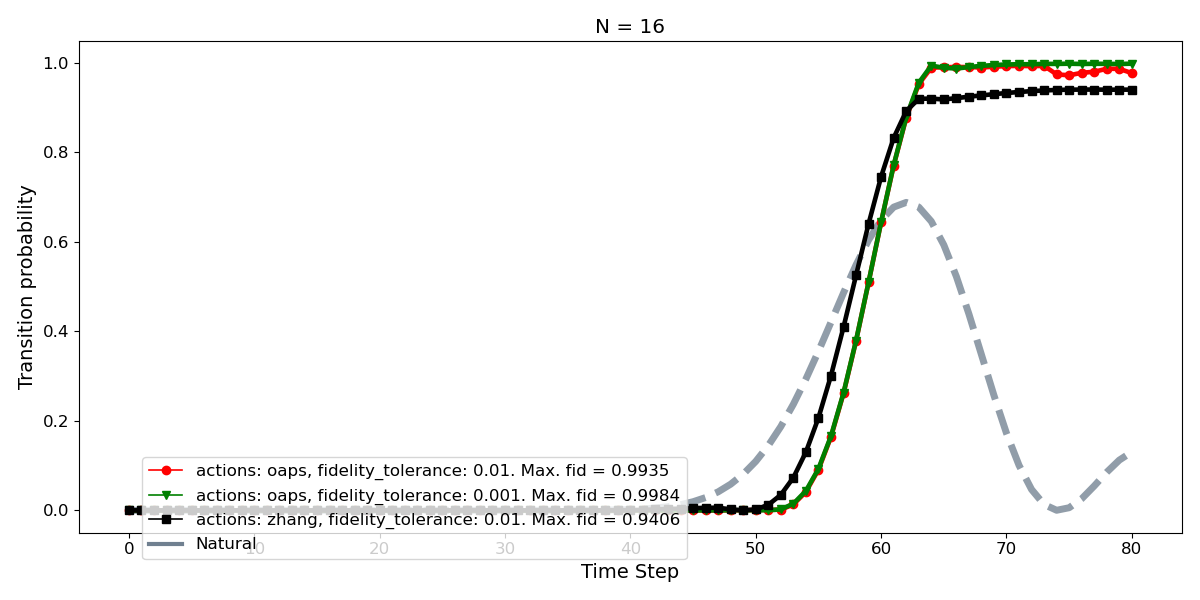

In [12]:
plt.figure(figsize=(12,6))
plt.title('N = 16')
plot_max_fid_solutions([rb_zhang_ht,rb_oaps_ht, rb_oaps_htt],16,add_natural=True,fs=14,nsamples=1)
plt.tight_layout()
plt.show()

Accessing GA parameters from genetic_algorithm_results/rb_zhang_ht/...
Accessing GA parameters from genetic_algorithm_results/rb_oaps_ht...
Accessing GA parameters from genetic_algorithm_results/rb_oaps_t999...
['act_sequence_n24_sample2.dat', 'act_sequence_n24_sample8.dat', 'act_sequence_n24_sample0.dat', 'act_sequence_n24_sample11.dat', 'act_sequence_n24_sample18.dat', 'act_sequence_n24_sample6.dat', 'act_sequence_n24_sample3.dat', 'act_sequence_n24_sample7.dat', 'act_sequence_n24_sample9.dat', 'act_sequence_n24_sample13.dat', 'act_sequence_n24_sample14.dat', 'act_sequence_n24_sample1.dat', 'act_sequence_n24_sample5.dat', 'act_sequence_n24_sample10.dat', 'act_sequence_n24_sample19.dat', 'act_sequence_n24_sample17.dat', 'act_sequence_n24_sample4.dat', 'act_sequence_n24_sample16.dat', 'act_sequence_n24_sample15.dat', 'act_sequence_n24_sample12.dat', 'config.ini']
Max fid: 0.9942918312281527 Max Index: 10
['act_sequence_n24_sample2.dat', 'act_sequence_n24_sample8.dat', 'act_sequence_n24

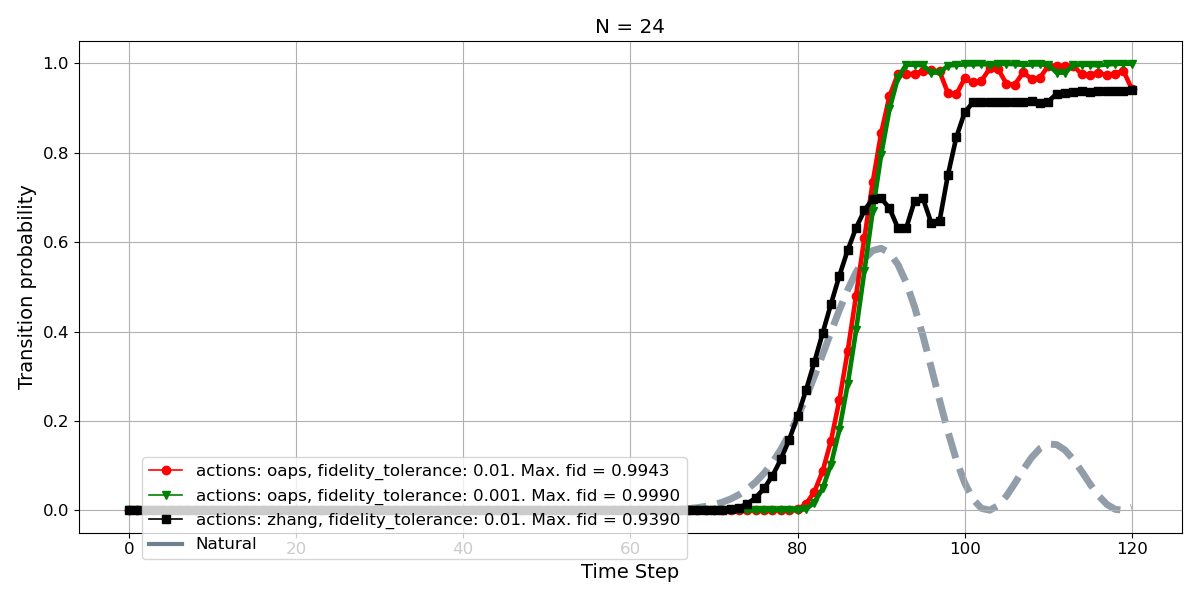

In [13]:
plt.figure(figsize=(12,6))
plt.title('N = 24')
plot_max_fid_solutions([rb_zhang_ht,rb_oaps_ht, rb_oaps_htt],24,add_natural=True,fs=14,nsamples=1)
plt.tight_layout()
plt.grid()
plt.show()

Accessing GA parameters from genetic_algorithm_results/rb_zhang_ht/...
Accessing GA parameters from genetic_algorithm_results/rb_oaps_ht...
Accessing GA parameters from genetic_algorithm_results/rb_oaps_t999...
['act_sequence_n40_sample4.dat', 'act_sequence_n40_sample15.dat', 'act_sequence_n40_sample6.dat', 'act_sequence_n40_sample11.dat', 'act_sequence_n40_sample14.dat', 'act_sequence_n40_sample10.dat', 'act_sequence_n40_sample8.dat', 'act_sequence_n40_sample18.dat', 'act_sequence_n40_sample0.dat', 'act_sequence_n40_sample7.dat', 'act_sequence_n40_sample19.dat', 'act_sequence_n40_sample13.dat', 'act_sequence_n40_sample2.dat', 'act_sequence_n40_sample17.dat', 'act_sequence_n40_sample16.dat', 'act_sequence_n40_sample12.dat', 'act_sequence_n40_sample1.dat', 'act_sequence_n40_sample5.dat', 'act_sequence_n40_sample3.dat', 'config.ini', 'act_sequence_n40_sample9.dat']
Max fid: 0.9914098665046172 Max Index: 19
['act_sequence_n40_sample4.dat', 'act_sequence_n40_sample15.dat', 'act_sequence_n4

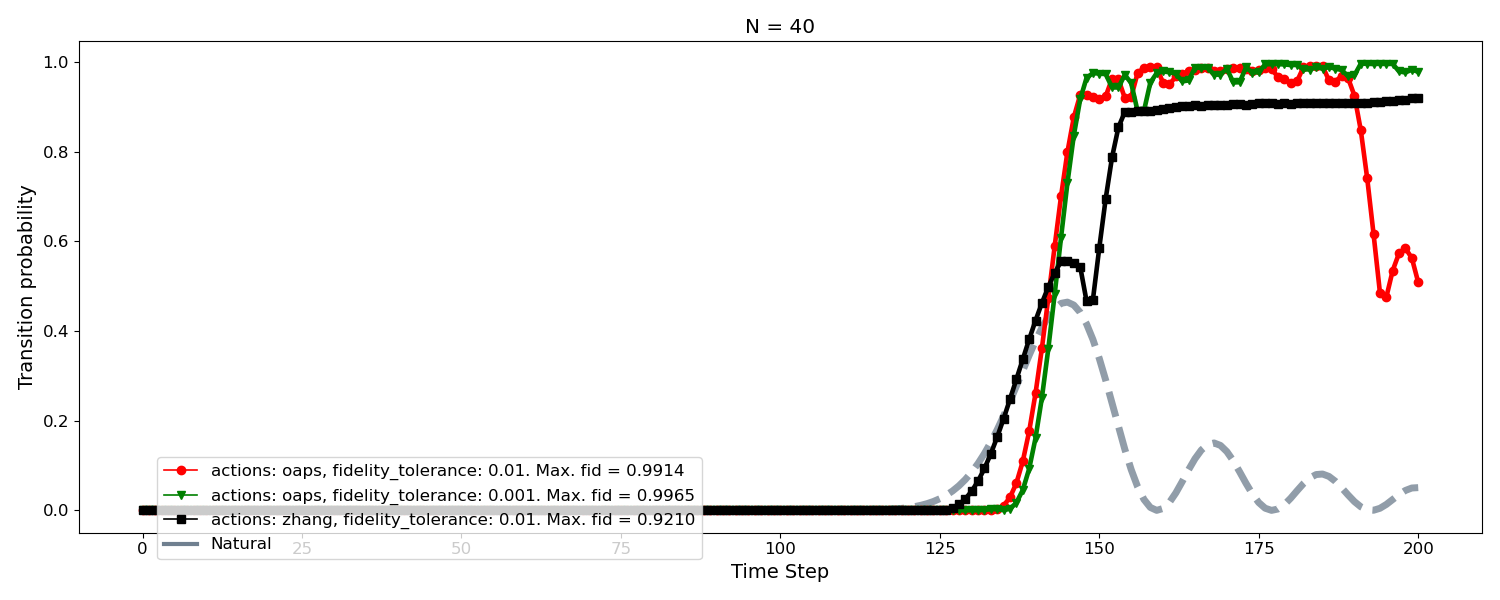

In [14]:
plt.figure(figsize=(15,6))
plt.title('N = 40')
plot_max_fid_solutions([rb_zhang_ht,rb_oaps_ht, rb_oaps_htt],40,add_natural=True,fs=14,nsamples=1)
plt.tight_layout()
plt.show()

In [15]:

import pickle

# Replace 'file_path.pkl' with the path to your .pkl file
with open('genetic_algorithm_results/n16_test_optuna/best_trial.pkl', 'rb') as file:
    data = pickle.load(file)

print(data)


{'value': 242.82268890329294, 'params': {'dt': 0.6762686195810219, 'b': 44.68861971393807}, 'trial_index': 3}


In [24]:
optuna_test = 'test2/trial_1'
n = 12
ga_sequences = uniformize_data(
    "ga", **{"directory": optuna_test, "n": n}
)
plt.figure(figsize=(12, 6))
plot_single_sequence(ga_sequences[0][:],12,dt=0.5209244690904312,b=54.09603882336425,actions='oaps',add_natural=False)

['metrics_summary.csv', 'trial_1_data.csv', 'act_sequence_n12_sample0.dat', 'act_sequence_n12_sample1.dat', 'act_sequence_n12_sample4.dat', 'act_sequence_n12_sample3.dat', 'updated_config.ini', 'act_sequence_n12_sample2.dat']


FileNotFoundError: test2/trial_1act_sequence_n12_sample0.dat not found.

# DRL results

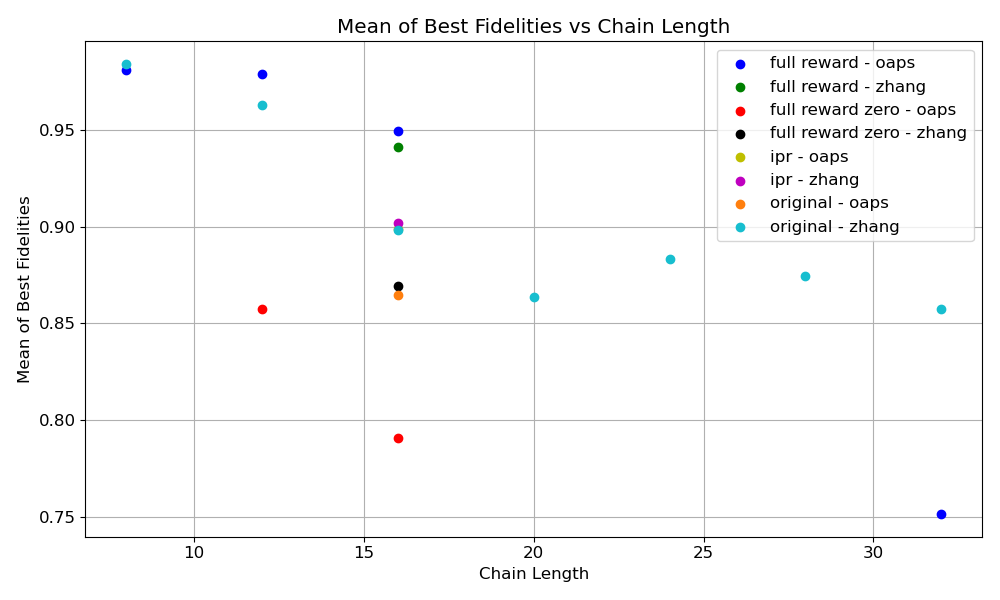

In [ ]:
import configparser

drl_results_path = 'drl_results'
drl_experiments = [d for d in os.listdir(drl_results_path) if os.path.isdir(os.path.join(drl_results_path, d))]

results = []

for experiment in drl_experiments:
    experiment_path = os.path.join(drl_results_path, experiment)
    
    # Read parameters from config.ini
    config = configparser.ConfigParser()
    config.read(os.path.join(experiment_path, 'config.ini'))
    params = {section: dict(config.items(section)) for section in config.sections()}
    
    # Read best fidelities
    with open(os.path.join(experiment_path, 'best_fidelities.txt'), 'r') as f:
        fidelities = [float(line.strip()) for line in f.readlines()]
    
    # Calculate average of the 10 best fidelities
    avg_best_fidelities = np.mean(sorted(fidelities, reverse=True)[:10])
    
    # Flatten parameters and add average fidelity
    flat_params = {f"{section}_{key}": value for section, values in params.items() for key, value in values.items()}
    flat_params['avg_best_fidelities'] = avg_best_fidelities
    results.append(flat_params)

# Create a dataframe
drl_results_df = pd.DataFrame(results)
# Group by reward_function and action_set, then calculate the mean of avg_best_fidelities for each chain length
grouped = drl_results_df.groupby(['tags_reward_function', 'tags_action set', 'system_parameters_chain_length'])['avg_best_fidelities'].mean().reset_index()

# Convert chain length to numeric for proper plotting
grouped['system_parameters_chain_length'] = pd.to_numeric(grouped['system_parameters_chain_length'])

# Plot
plt.figure(figsize=(10, 6))
for (reward_function, action_set), group in grouped.groupby(['tags_reward_function', 'tags_action set']):
    plt.scatter(group['system_parameters_chain_length'], group['avg_best_fidelities'], label=f"{reward_function} - {action_set}")

plt.xlabel('Chain Length')
plt.ylabel('Mean of Best Fidelities')
plt.title('Mean of Best Fidelities vs Chain Length')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()